#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import missingno as msno
import plotly.express as px
%matplotlib inline

#### Import Covid-19 dataset

In [2]:
path = r"https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_data = pd.read_csv(path)

#### Selecting Countries for visualization

In [3]:
country_list=['France',
              'Germany',
              'Italy',
             ] 

1. Plot of The relative cases overtime of Covid infectors (Total cases/Population of a country) vs Time

In [4]:
covid_data['total_per_pop']=covid_data['total_cases']/covid_data['population']*100

Text(0.5, 0, 'Date')

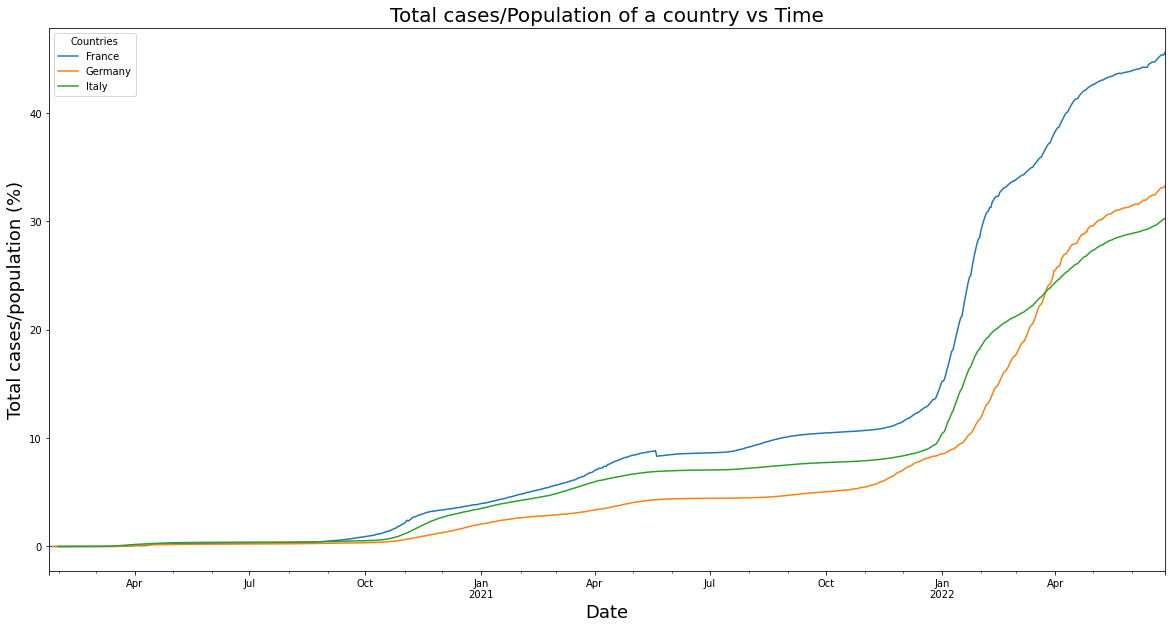

In [5]:
time_idx=covid_data['date']
df_plot = pd.DataFrame({'date':time_idx})
for each in country_list:
    date1 = pd.to_datetime(covid_data[covid_data['location']==each]['date'])
    covid_data[covid_data['location']==each].set_index(date1).total_per_pop.plot(figsize=(20,10))
    
plt.legend(country_list, title='Countries')
plt.rcParams.update({'font.size': 18})
plt.title('Total cases/Population of a country vs Time', {'fontsize':20})
plt.ylabel("Total cases/population (%)", {'fontsize':18})
plt.xlabel("Date", {'fontsize':18})

(18624.0, 19170.0)

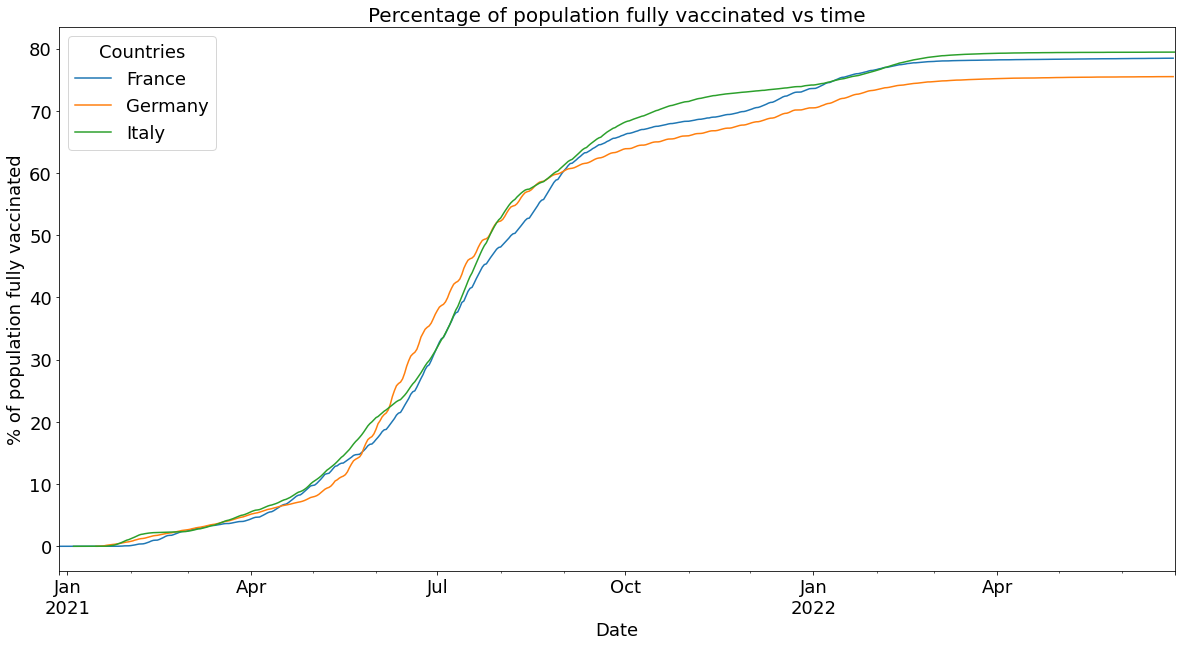

In [6]:
import datetime
time_idx=covid_data['date']
df_plot = pd.DataFrame({'date':time_idx})
for each in country_list:
    date1 = pd.to_datetime(covid_data[covid_data['location']==each]['date'])
    covid_data[covid_data['location']==each].set_index(date1).people_fully_vaccinated_per_hundred.plot(figsize=(20,10))
    
plt.legend(country_list, title='Countries')
plt.rcParams.update({'font.size': 15})
plt.title('Percentage of population fully vaccinated vs time', {'fontsize':20})
plt.ylabel("% of population fully vaccinated", {'fontsize':18})
plt.xlabel("Date", {'fontsize':18})
plt.xlim(xmin=datetime.datetime(2020, 12, 28), xmax = max(time_idx))